<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-формулы-вычисления-эффективности-обогащения" data-toc-modified-id="Проверка-формулы-вычисления-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка формулы вычисления эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-элементов-на-каждом-этапе" data-toc-modified-id="Изменение-концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации элементов на каждом этапе</a></span></li><li><span><a href="#Анлиз-распределения-размеров-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Анлиз-распределения-размеров-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анлиз распределения размеров гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарных-концентрации" data-toc-modified-id="Исследование-суммарных-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарных концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итогового-sMAPE" data-toc-modified-id="Функция-для-вычисления-итогового-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итогового <em>sMAPE</em></a></span></li><li><span><a href="#Построение-несколько-моделей" data-toc-modified-id="Построение-несколько-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение несколько моделей</a></span></li><li><span><a href="#Выбор-лучшей-модели-и--её-проверка" data-toc-modified-id="Выбор-лучшей-модели-и--её-проверка-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выбор лучшей модели и  её проверка</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import RandomState

# Графики
import matplotlib.pyplot as plt
import seaborn as sns

# Модели машинного обучения
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Метрики
from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor

# Преобразования
from sklearn.preprocessing import StandardScaler

In [2]:
# Определим random_state
state =  RandomState(12345)

## Подготовка данных

**В рамках подготовки данных необходимо:** 

 -  Проверить формулу вычисления эффективности обогащения
 -  Проанализировать признаки, недоступные в тестовой выборке
 -  Провести предобработку данных

In [3]:
data_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
data_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
data_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")

data_list = [data_train, data_test, data_full]

In [4]:
data_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
for df in data_list:
    print(df.shape)

(14149, 87)
(5290, 53)
(19439, 87)


In [6]:
for df in data_list:
    print(df.duplicated().sum())

0
0
0


In [7]:
for df in data_list:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
for df in data_list:
    print(df.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_

In [9]:
#Исследование данных data_full
df_columns = (
    data_full.columns
    .rename("full_parameter_name")
    .to_frame()
    .reset_index(drop=True)
)
df_columns

,full_parameter_name
0,date
1,final.output.concentrate_ag
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.concentrate_au
...,...
82,secondary_cleaner.state.floatbank5_a_level
83,secondary_cleaner.state.floatbank5_b_air
84,secondary_cleaner.state.floatbank5_b_level
85,secondary_cleaner.state.floatbank6_a_air


In [10]:
#Исследование данных data_full
# Убираем дату из первой строки
df_columns = df_columns.loc[1:]
df_columns.head(2)

,full_parameter_name
1,final.output.concentrate_ag
2,final.output.concentrate_pb


In [11]:
#Исследование данных data_full
# Разбиваем full_parameter_name на три новых столбца
df_columns = pd.concat(
    [
     df_columns,
     df_columns["full_parameter_name"]
     .str.split(".", expand=True)
     .rename(columns={0: "stage", 1: "parameter_type", 2: "parameter_name"}),
    ],
    axis=1,
)

df_columns

,full_parameter_name,stage,parameter_type,parameter_name
1,final.output.concentrate_ag,final,output,concentrate_ag
2,final.output.concentrate_pb,final,output,concentrate_pb
3,final.output.concentrate_sol,final,output,concentrate_sol
4,final.output.concentrate_au,final,output,concentrate_au
5,final.output.recovery,final,output,recovery
...,...,...,...,...
82,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner,state,floatbank5_a_level
83,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner,state,floatbank5_b_air
84,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner,state,floatbank5_b_level
85,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner,state,floatbank6_a_air


В данных:

 - Есть пропуски , однако их немного. Первоначально собирался их удалить, однако по рекомендации наставника заменил методом ffill.

 - Для столбца date изменим тип с object на datetime, в остальном типы данных соответствует требованиям.

 - Регистр названий столбцов в датасетах соответствует стандарту.

In [12]:
#Удаляем пропуски
# for df in data_list:
#     #df.dropna(inplace = True)
#     #df = df.fillna(method="ffill")
#     df = df.ffill(axis = 0)
data_train = data_train.fillna(method="ffill")
print(data_train.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [13]:
data_test = data_test.fillna(method="ffill")
print(data_test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [14]:
data_full = data_full.fillna(method="ffill")
print(data_full.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


### Проверка формулы вычисления эффективности обогащения

**Изучение параметров производственного процесса**

Задачи:

 - понять структуру общего набора данных
 - изучить связь данных с производственным процессом
 - разобраться в 87 признаках для будущих предсказаний

Целевой признак и этапы процесса
У нас есть данные с 4-х последовательных этапов процесса добычи золота из руды:

 - rougher — флотация(gолучаем черновой концентрат)
 - primary_cleaner — первичная очистка
 - secondary_cleaner — вторичная очистка
 - final — финальные характеристики (получаем финальный концентрат)

Эффективность процесса получения золота из золотосодержащей руды (обогащения) оценивается с помощью коэффициента восстановления для обоих концентратов:

recovery = (C(F-T)/(F(C-T))*100%, где:

 - C — доля золота в концентрате ПОСЛЕ флотации/очистки;
 - F — доля золота в сырье/концентрате ДО флотации/очистки;
 - T — доля золота в отвальных ХВОСТАХ после флотации/очистки.

Целевые признаки для предсказания:

 - rougher.output.recovery
 - final.output.recovery

Напишем формулу эффективности обогащения и найдем MAE.

Для этого вычислите её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между полученными значениями и значением признака.

 - C - это rougher.output.concentrate_au
 - F - это rougher.input.feed_au
 - T - это rougher.output.tail_au
 
Значение признака - rougher.output.recovery

In [15]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
recovery = (C*(F-T)/(F*(C-T)))*100

In [16]:
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [17]:
print('MAE =', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

MAE = 9.73512347450521e-15


MAE - средний модуль разности, и показывает как сильно предсказания в среднем отличаются от истинных значений. Полученное значение говорит об отсутствии разницы.

### Анализ признаков, недоступных в тестовой выборке.

In [18]:
missed_signs = set(data_train.columns) - set(data_test.columns)


In [19]:
missed_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [20]:
print('Количество отсутствующих признаков =', len(missed_signs))

Количество отсутствующих признаков = 34


В основном в тестовой выборке отсутствуют значения типа "параметры продукта", и в меньшем количестве значения типа "расчетные характеристики". Отсутствие признаков можно обьяснить тем, что они рассчитываются значительно позже.

В тестовой выборки в том числе отсутствуют целевые признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрики качества. Добавим их в тестовую выборку.

### Предобработка данных

In [21]:
#Изменим тип данных колонки date в датасетах с object на datetime.
for df in data_list:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    df['date'].dtypes

In [22]:
#Добавим в тестовую выборку целевые признаки rougher.output.recovery и final.output.recovery,
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

Удалим лить колонку date, как не информативную для дальнейшего обучения модели.

In [23]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

In [24]:
# scaler = StandardScaler()
# scaler.fit(features_train[numeric])
# features_train[numeric] = scaler.transform(features_train[numeric])
# features_valid[numeric] = scaler.transform(features_valid[numeric])# < преобразуйте валидационную выборку >
# #scaler.fit_transform(features_train[numeric])

## Анализ данных

**В рамках анализа данных необходимо:** 

 - Исследовать изменение концентрации элементов на каждом этапе
 - Проанализировать распределения размеров гранул на обучающей и тестовой выборках
 - Исследовать суммарные концентрации

### Изменение концентрации элементов на каждом этапе

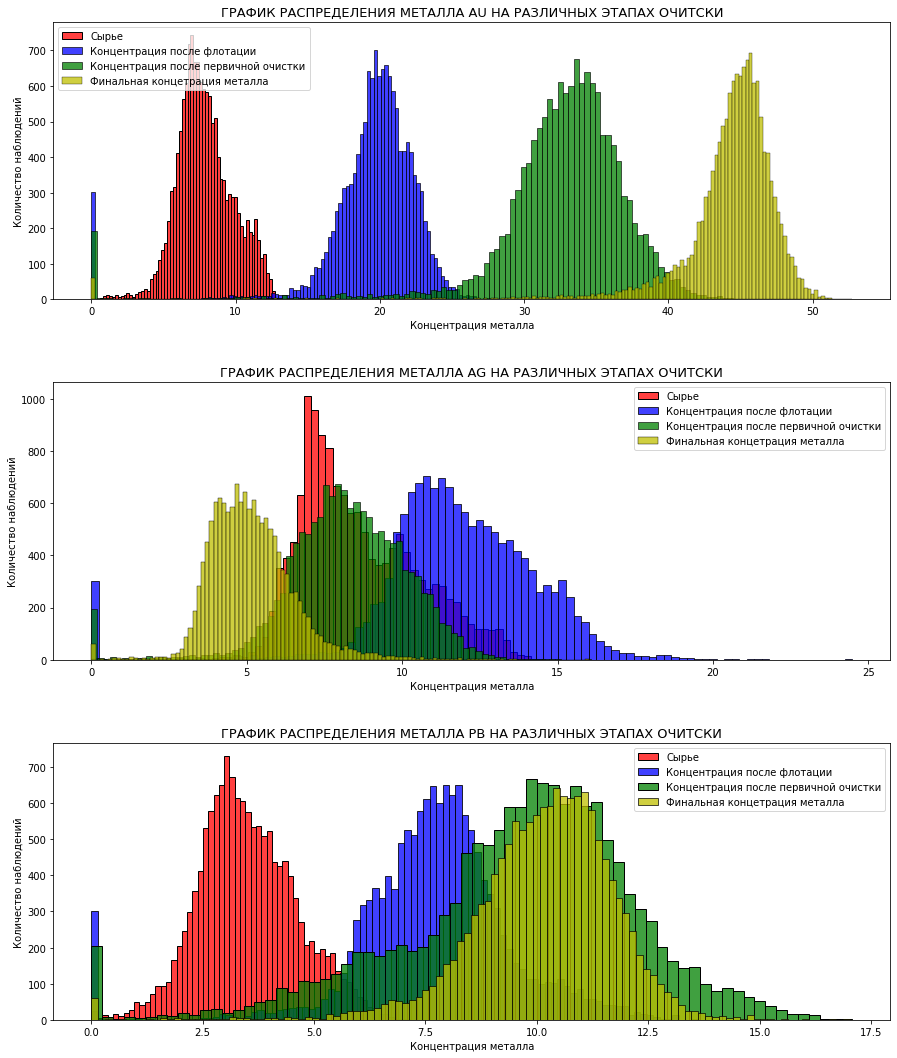

In [25]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)

for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ МЕТАЛЛА {str(metal).upper()} НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
    
    sns.histplot(data_train[f'rougher.input.feed_{metal}'], color='r', label='Сырье', kde=False)
    sns.histplot(data_train[f'rougher.output.concentrate_{metal}'], color='b', label='Концентрация после флотации', kde=False)
    sns.histplot(data_train[f'primary_cleaner.output.concentrate_{metal}'], color='g', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(data_train[f'final.output.concentrate_{metal}'], color='y', label='Финальная концетрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

 - Доля золота на после каждого этапа очитски постепенно увеличивается.
 - Доля серебра увеличивается на этапе флотации, а затем постепенно уменьшается.
 - Доля свинца сначала увеличивается на этапе флотации и после первичной очитски, затем остатется примерно на одном уровне.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Мне интересно было изучить твои графики, практичный и красочный графический анализ. Видно, что золото растёт в концентрации - это здорово!) А серебро падает - ведь наша цель -  золото, верно?)
А свинец - это побочный элемент химических реакций, по этой причине немного и увеличивается его концентрация

### Анлиз распределения размеров гранул на обучающей и тестовой выборках

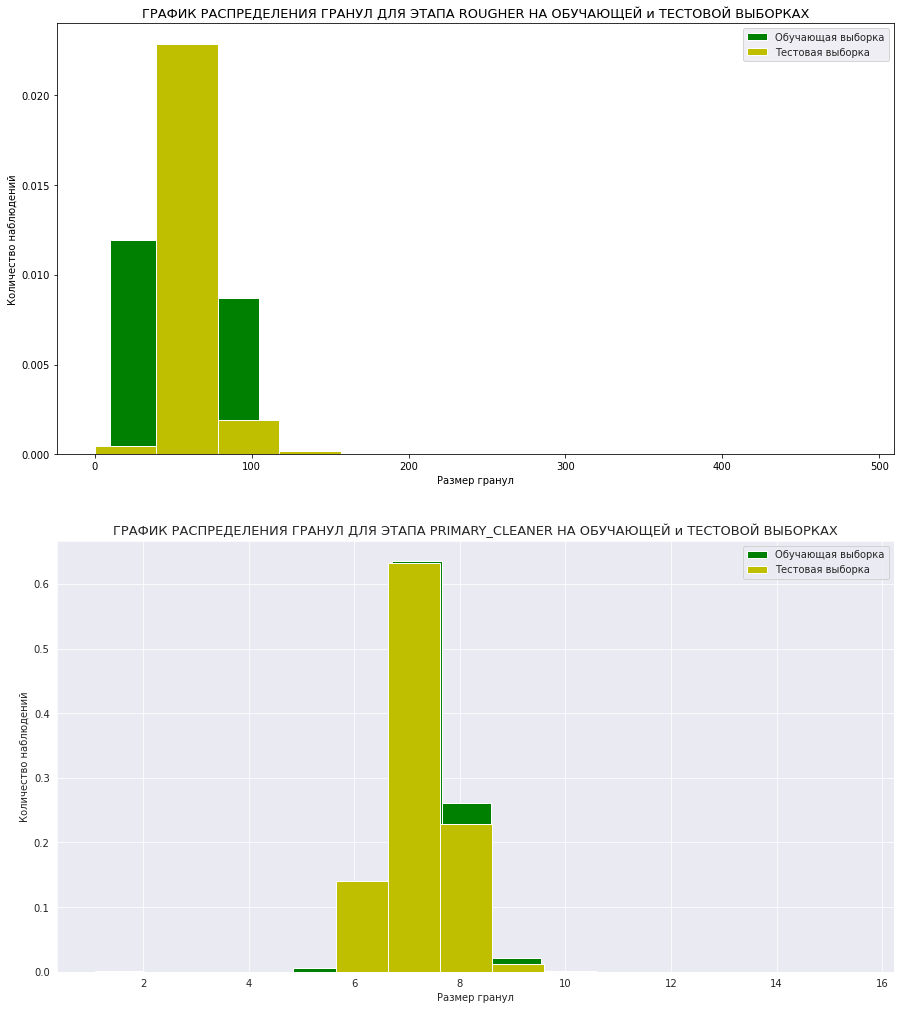

In [26]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.90, wspace=0.2, hspace=0.2)

for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ ДЛЯ ЭТАПА {str(stage).upper()} НА ОБУЧАЮЩЕЙ и ТЕСТОВОЙ ВЫБОРКАХ', fontsize=13)
    sns.set_style('darkgrid')
    plt.hist(data_train[f'{stage}.input.feed_size'], color='g', label='Обучающая выборка', density=True)
    plt.hist(data_test[f'{stage}.input.feed_size'], color='y', label='Тестовая выборка', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

Значимых различий между распределениями для выборок не наблюдается.

### Исследование суммарных концентрации

In [27]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0

sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += data_train[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += data_train[f'rougher.output.concentrate_{metal}']

    sum_concentrate_of_final_output += data_train[f'final.output.concentrate_{metal}']

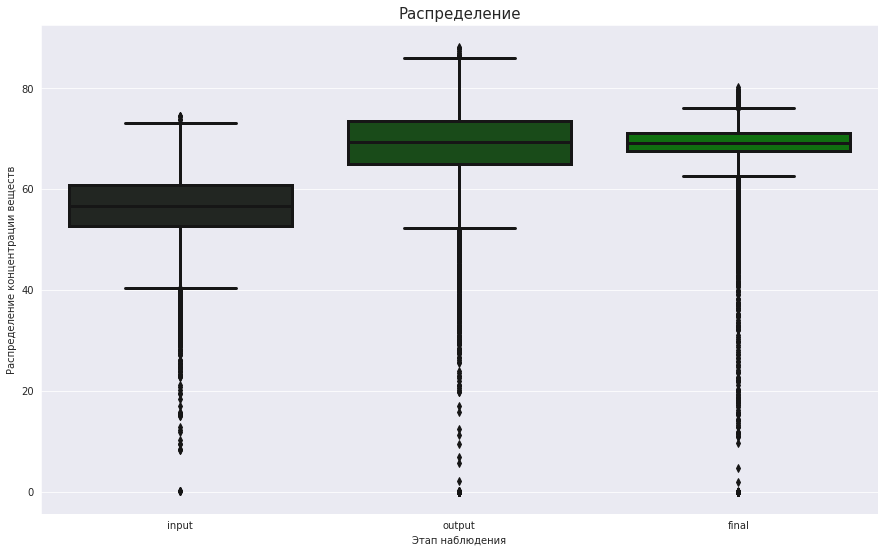

In [28]:

# Dataset:
a = pd.DataFrame({ 'group' : 'input', 'value': sum_concentrate_of_rougher_input })
b = pd.DataFrame({ 'group' : 'output', 'value': sum_concentrate_of_rougher_output })
c = pd.DataFrame({ 'group' : 'final', 'value': sum_concentrate_of_final_output })
ds=a.append(b).append(c)


 # Usual boxplot
plt.figure(figsize=[15, 9])
sns.boxplot(x='group', y='value', data=ds,linewidth=3, palette = sns.dark_palette("green", 3))
sns.set(style="dark")

plt.title("Распределение", loc="center",  fontsize=15)
plt.xlabel('Этап наблюдения')
plt.ylabel('Распределение концентрации веществ')
#plt.legend()
plt.show()


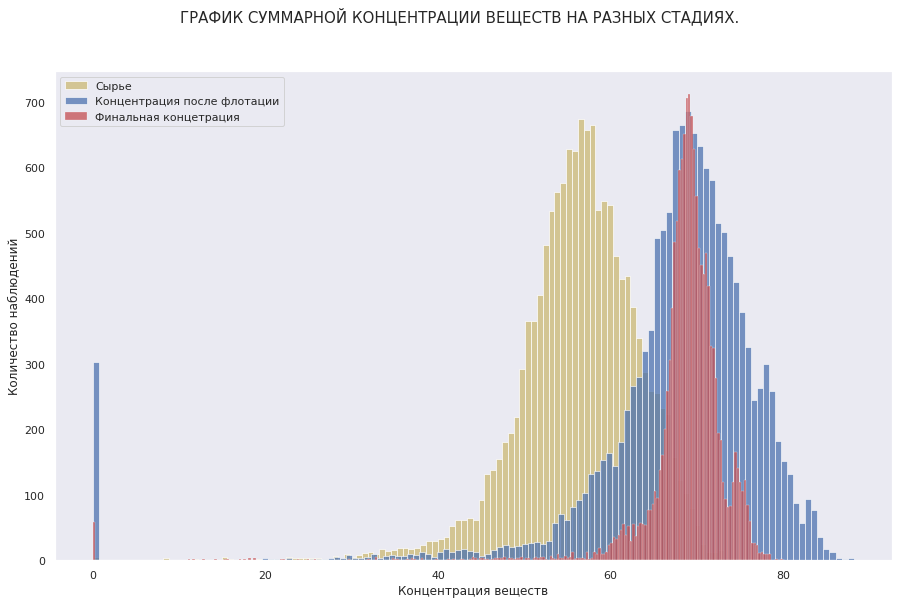

In [29]:
plt.figure(figsize=[15, 9])
plt.suptitle('ГРАФИК СУММАРНОЙ КОНЦЕНТРАЦИИ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ.', fontsize=15)

sns.histplot(sum_concentrate_of_rougher_input, color='y', label='Сырье', kde=False)
sns.histplot(sum_concentrate_of_rougher_output, color='b', label='Концентрация после флотации', kde=False)
# sns.histplot(sum_concentrate_of_primary_cleaner_output, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(sum_concentrate_of_final_output, color='r', label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();


Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.

In [30]:
# mas_sum_consentr = [sum_concentrate_of_rougher_input, sum_concentrate_of_rougher_output, sum_concentrate_of_final_output]
# for sum_consentr in mas_sum_consentr:
#     index_to_del_mas=np.where(np.abs(stats.zscore(sum_consentr)) > 3)
#     index_to_del = pd.Series(index_to_del_mas)
#     data_train = data_train.drop(index=index_to_del)


In [31]:
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0)
                        & (data_train['rougher.output.concentrate_ag'] != 0)
                        & (data_train['rougher.output.concentrate_pb'] != 0)
                        & (data_train['rougher.output.concentrate_sol'] != 0)]

data_train = data_train[(data_train['final.output.concentrate_au'] != 0) 
                      & (data_train['final.output.concentrate_ag'] != 0) 
                      & (data_train['final.output.concentrate_pb'] != 0) 
                      & (data_train['final.output.concentrate_sol'] != 0)]

In [32]:
data_full = data_full[(data_full['rougher.output.concentrate_au'] != 0) 
                  & (data_full['rougher.output.concentrate_ag'] != 0) 
                  & (data_full['rougher.output.concentrate_pb'] != 0) 
                  & (data_full['rougher.output.concentrate_sol'] != 0)]

data_full = data_full[(data_full['final.output.concentrate_au'] != 0) 
                  & (data_full['final.output.concentrate_ag'] != 0) 
                  & (data_full['final.output.concentrate_pb'] != 0) 
                  & (data_full['final.output.concentrate_sol'] != 0)]


<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Модель

**В рамках модели необходимо:** 

 - Написать функцию для вычисления итогового *sMAPE*
 - Построить несколько моделей
 - Выбранть лучшую модель и  её качество проверить на тестовой выборке

### Функция для вычисления итогового *sMAPE*

Функция для вычисления sMAPE

In [33]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [34]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

 Функция для вычисления итогового *sMAPE*

In [35]:
def get_final_smape(rougher, final):
    final_smape = 0.25*rougher+0.75*final
    return final_smape

### Построение несколько моделей

In [36]:
signs_for_delete_without_target_signs = missed_signs - set(['rougher.output.recovery','final.output.recovery'])

In [37]:
data_train = data_train .drop(columns=signs_for_delete_without_target_signs, axis=1)

In [38]:
features_train = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

In [39]:
#Линейная регрессия
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_train,
                          target_train_rougher,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()

model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_train,
                        target_train_final,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
best_model_for_lr = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
print('sMAPE:', best_model_for_lr)

sMAPE: 10.059261443482796


In [40]:
%%time
#Дерево решений
best_model_for_dt = 100
d_dt = 0
for d in range(1, 15, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=d, random_state=state)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_train,
                              target_train_rougher,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=d, random_state=state)
    smape_final = cross_val_score(model_dt_final, 
                                  features_train,
                                  target_train_final,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_model_for_dt:
        best_model_for_dt = result_smape
        d_dt = d
print('sMAPE:', best_model_for_dt,  'max_depth:',  d_dt)

sMAPE: 8.925785452030949 max_depth: 3
CPU times: user 57.7 s, sys: 225 ms, total: 57.9 s
Wall time: 58 s


In [41]:
%%time
#Случайный лес 

best_model_for_rf = 100
n_rf = 0
d_rf = 0
for n in range(1, 15, 3):
    for d in range(2,5,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_train,
                                  target_train_rougher,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=state)
        smape_final = cross_val_score(model_rf_final,
                                features_train,
                                target_train_final,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            n_rf = n
            d_rf = d
            
print('sMAPE:', best_model_for_rf, 'max_depth:', d_rf, 'max_n_estimators:',n_rf)

sMAPE: 8.529258429567625 max_depth: 4 max_n_estimators: 10
CPU times: user 1min 19s, sys: 312 ms, total: 1min 19s
Wall time: 1min 19s


In [42]:
# #Случайный лес из моей предыдущей работы
# #%%time
# r2_forest = 0
# n_estim_forest = 0
# depth_forest = 0
# for n_estim in range(40,100,1):
#     for max_depth in range(3,15,1):
#         model_forest=RandomForestClassifier(
#             max_depth=max_depth,n_estimators=n_estim,random_state=ran_st).fit(features_train,target_train)
#         predict_forest = model_forest.predict(features_valid)
#         mae = mean_absolute_error(target_valid, predict_forest)
#         rmse = mean_squared_error(target_valid, predict_forest)**0.5
#         r2 =  r2_score(target_valid, predict_forest)
#         if r2_forest > r2:
#             r2_forest = r2
#             depth_forest = depth
#             n_estim_forest = n_estim
#             mae_forest = mae
#             rmse_forest = rmse 

# best_model_forest = RandomForestClassifier(
#     max_depth=depth_max,n_estimators=n_estim_forest,random_state=ran_st).fit(features_train,target_train)

# print('R2:', r2_forest, 'MAE:', mae_forest, 'RMSE:', rmse_forest,'max_depth:', depth_forest, 'max_n_estimators:', n_estim_forest)
# tree_array =   [r2_tree,   mae_tree,   rmse_tree]
# forest_array = [r2_forest, mae_forest, rmse_forest]
# log_array =    [r2_log,    mae_log,    rmse_log]
# result={'Дерево Решения':np.array(tree_array),'Случайный лес':np.array(forest_array),'Логистическая регрессия':np.array(log_array)}
# result_df=pd.DataFrame(result,index=['R2','MAE', 'RMSE'])

### Выбор лучшей модели и  её проверка

In [43]:
tree_array =   [best_model_for_dt]
forest_array = [best_model_for_rf]
log_array =    [best_model_for_lr]
result={'Дерево Решения':np.array(tree_array),'Случайный лес':np.array(forest_array),'Логистическая регрессия':np.array(log_array)}
result_df=pd.DataFrame(result,index=['smape'])

In [44]:
result_df

,Дерево Решения,Случайный лес,Логистическая регрессия
smape,8.925785,8.529258,10.059261


Лучшая модель - RandomForestRegressor

Применим лучшую модель на тестовой выборке

Подготовим данные для тестирования

In [45]:
features_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

In [46]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13792 entries, 0 to 14148
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13792 non-null  float64
 1   primary_cleaner.input.depressant            13792 non-null  float64
 2   primary_cleaner.input.feed_size             13792 non-null  float64
 3   primary_cleaner.input.xanthate              13792 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13792 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13792 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13792 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13792 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13792 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13792 non-null  float64
 10  primary_cl

In [47]:
model_test_rougher = RandomForestRegressor(n_estimators=n_rf, max_depth=d_rf, random_state=state)
model_test_rougher.fit(features_train, target_train_rougher)
predicted_rougher = model_test_rougher.predict(features_test)

model_test_final = RandomForestRegressor(
    n_estimators=n_rf, max_depth=d_rf, random_state=state).fit(features_train, target_train_final)
predicted_final = model_test_final.predict(features_test)

smape_test_rougher = get_smape(target_test_rougher, predicted_rougher)
smape_test_final = get_smape(target_test_final, predicted_final)
final_smape_test = get_final_smape(smape_test_rougher, smape_test_final)

In [48]:
print(f'SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - {final_smape_test}')

SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТОВЛЯЕТ - 9.504033186609172


Проверим полученную модель на адекватность. Вычислим показатель sMape для константной модели и сравним с результатами лучшей модели.

In [49]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_train, target_train_rougher)
dummy_regr_for_final.fit(features_train, target_train_final)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_test)
dummy_predicted_final = dummy_regr_for_final.predict(features_test)

smape_for_const_rougher = get_smape(target_test_rougher, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_test_final, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

In [50]:
print(f'ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')

ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.82146839182027


Показатель модели меньше показателя константной модели, что означает ее хорошее качество.

**Вывод**

Моделью с лучшими результатами прогноза является - RandomForest, ее показатель меньше показателя константной модели, что означает хорошее качество. Модель проверена на адекватность.

Установленно, что мере прохождения стадий технологического процесса доля золота и свинца увеличичвается, а серебра уменьшается. Общее суммарное количество веществ снижается по мере прохождения этапов обработки.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке